In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

### Predicting test set results

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
np.concatenate([y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1]], dtype=int64)

### Making confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.94

In [16]:
precision = precision_score(y_test, y_pred)
precision

0.8823529411764706

In [17]:
recall = recall_score(y_test, y_pred)
recall

0.9375

In [18]:
f1_score = f1_score(y_test, y_pred)
f1_score

0.9090909090909091

### Visualising test set results

C:\Users\yashl\AppData\Local\Temp\ipykernel_10608\3409147248.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


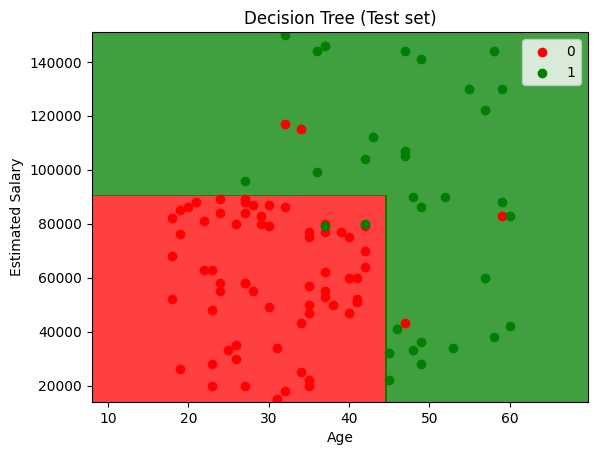

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising tree

In [20]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'Age <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = No'),
 Text(0.25, 0.5, 'EstimatedSalary <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.619\nsamples = 39\nvalue = [6, 33]\nclass = Yes'),
 Text(0.75, 0.5, 'EstimatedSalary <= -0.814\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.211\nsamples = 30\nvalue = [1, 29]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.789\nsamples = 55\nvalue = [13, 42]\nclass = Yes')]

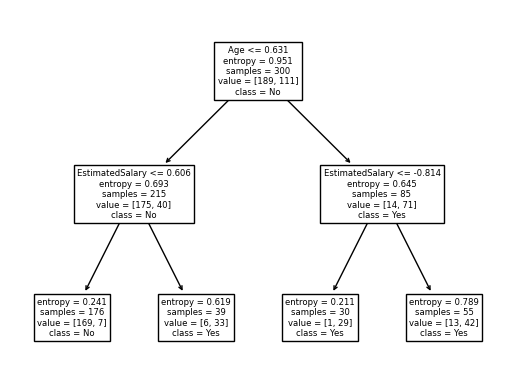

In [21]:
plot_tree(classifier, feature_names=df.columns[:-1], class_names=['No', 'Yes'])